<a href="https://colab.research.google.com/github/HuynhDuyNhan/AI/blob/main/Fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,preprocessing
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [ ]:
%cd "gdrive/MyDrive/AI/Fruits"

/content/gdrive/MyDrive/AI/Fruits


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/AI/Fruits/Train',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 910 images belonging to 10 classes.


In [ ]:
test_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/AI/Fruits/Test',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 384 images belonging to 10 classes.


In [ ]:
class_name = training_set.class_indices
class_name

{'Bơ': 0,
 'Cam': 1,
 'Chanh dây': 2,
 'Chuối': 3,
 'Dưa hấu': 4,
 'Dứa': 5,
 'Kiwi': 6,
 'Lựu': 7,
 'Táo': 8,
 'Xoài': 9}

In [ ]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D,Dense
model=Sequential() 

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same' ,input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/50
29/29 [==============================] - 312s 11s/step - loss: 2.2988 - accuracy: 0.5011 - val_loss: 0.2537 - val_accuracy: 0.9115
Epoch 2/50
29/29 [==============================] - 129s 4s/step - loss: 0.2085 - accuracy: 0.9396 - val_loss: 0.0395 - val_accuracy: 0.9844
Epoch 3/50
29/29 [==============================] - 129s 4s/step - loss: 0.0556 - accuracy: 0.9791 - val_loss: 0.0192 - val_accuracy: 0.9948
Epoch 4/50
18/29 [=================>............] - ETA: 43s - loss: 0.1152 - accuracy: 0.9588

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-c83d9d574375>", line 1, in <module>
    history=model.fit(training_set,epochs=50,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1384, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/def_function.py", line 915, in __call__
    result = self._call(*args, **kwds)
  File "/usr/l

KeyboardInterrupt: ignored

In [ ]:
from keras.models import load_model
#model.save('Fruits.h5')
model_CNN = load_model('Fruits.h5')

Táo


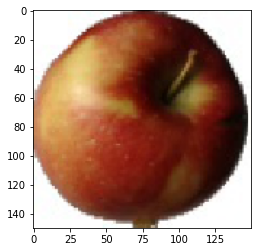

Bơ


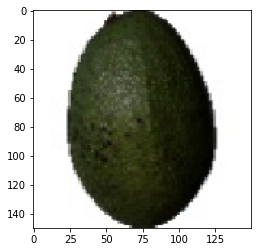

Chuối


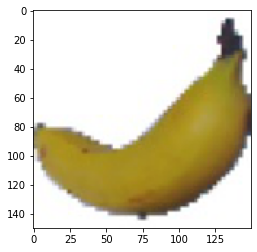

Kiwi


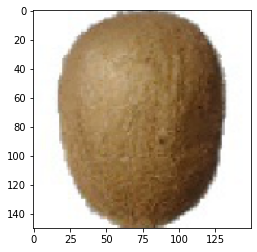

Táo


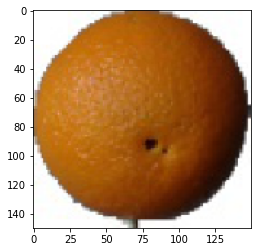

Xoài


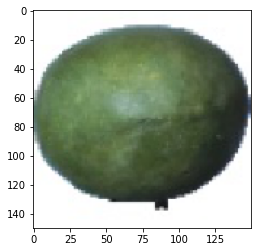

Chanh dây


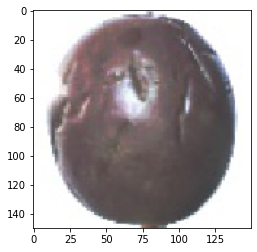

Lựu


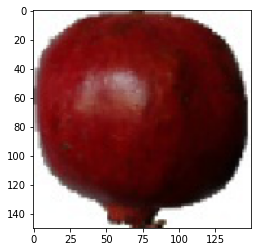

Dứa


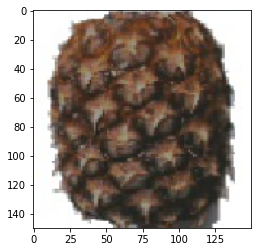

Dưa hấu


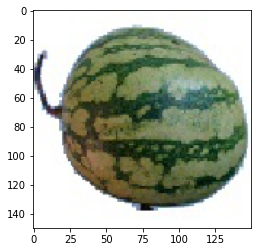

In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
test="/content/gdrive/MyDrive/AI/Fruits/Validation/"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Bơ'
  if round(result[0][1])==1:
    prediction='Cam'
  if round(result[0][2])==1:
    prediction='Chanh dây'
  if round(result[0][3])==1:
    prediction='Chuối'
  if round(result[0][4])==1:
    prediction='Dưa hấu'
  if round(result[0][5])==1:
    prediction='Dứa'
  if round(result[0][6])==1:
    prediction='Kiwi'
  if round(result[0][7])==1:
    prediction='Lựu'
  if round(result[0][8])==1:
    prediction='Táo'
  if round(result[0][9])==1:
    prediction='Xoài'
  print(prediction)
  plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Fruits')

Mounted at /content/drive
--2022-05-21 04:44:41--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-05-21 04:44:41 (29.1 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Fruits to pdf
[NbConvertApp] Support files will be in Fruit_files/
[NbConvertApp] Making directory ./Fruit_files
[NbConvertApp] Making directory ./Fruit_files
[NbConvertApp] Making directory ./Fruit_files
[NbConvertApp] Making directory ./Fruit_files
[NbConvertApp] Making directo

'File Download Unsuccessful. Saved in Google Drive'